In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import sys
import os
import pandas as pd

In [2]:
# Config of the notebook
random_seed = 585

In [3]:
# Download latest version
stock_data = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "camnugent/sandp500",
    "all_stocks_5yr.csv",
)

# download company info
comp_info = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "paytonfisher/sp-500-companies-with-financial-information",
    "financials.csv",
)


100%|██████████| 9.60M/9.60M [00:00<00:00, 52.0MB/s]

Extracting zip of all_stocks_5yr.csv...


100%|██████████| 91.2k/91.2k [00:00<00:00, 1.25MB/s]


In [4]:
# Let's see if there is any company left out from the main stocks dataset
left = stock_data["Name"].drop_duplicates()
right = comp_info

res = pd.merge(left, right, how='left', left_on='Name', right_on='Symbol')
missing_count = len(res[res["Sector"].isna()])

print(f"Out of {len(res)} companies, {missing_count} are missing in the info dataset.")

Out of 505 companies, 0 are missing in the info dataset.


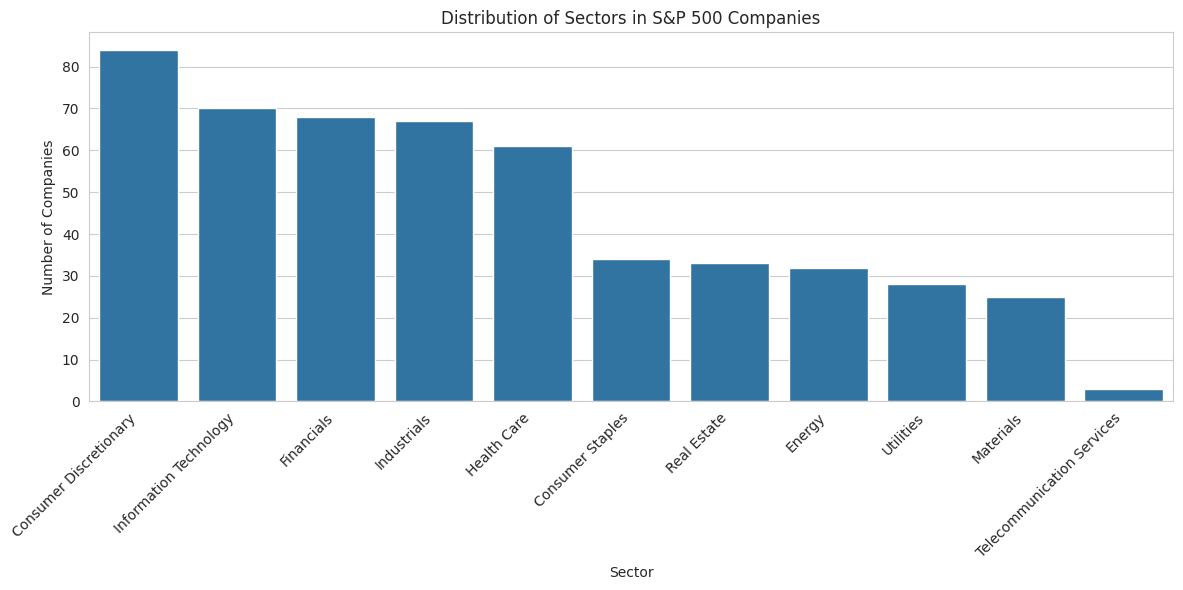

In [5]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import seaborn for enhanced visualizations (optional but recommended)
import seaborn as sns

# Set a style for the plots (optional)
sns.set_style("whitegrid")

# Calculate the value counts for the 'Sector' column
sector_counts = comp_info['Sector'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
sns.barplot(x=sector_counts.index, y=sector_counts.values)

# Add titles and labels
plt.title('Distribution of Sectors in S&P 500 Companies')
plt.xlabel('Sector')
plt.ylabel('Number of Companies')

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()

### Selected Companies

In [20]:
# sample 5 top sectors and select 5 random stocks
selected_sectors = list(sector_counts.index[:3])

selected_sector_comp = comp_info[comp_info.apply(lambda row: row["Sector"] in selected_sectors, axis=1)]

selected_companies = selected_sector_comp.groupby(by="Sector").sample(5, random_state=random_seed)
selected_companies.head(5)

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
106,CMG,Chipotle Mexican Grill,Consumer Discretionary,266.01,45.86,0.000000,0.80,499.00,263.00,7.685284e+09,4.012930e+08,2.552385,6.11,http://www.sec.gov/cgi-bin/browse-edgar?action...
313,MHK,Mohawk Industries,Consumer Discretionary,256.57,19.08,0.000000,12.48,286.85,209.90,1.989736e+10,1.750393e+09,2.797782,2.88,http://www.sec.gov/cgi-bin/browse-edgar?action...
206,GRMN,Garmin Ltd.,Consumer Discretionary,61.13,21.23,3.233989,2.69,64.96,48.50,1.184033e+10,7.367980e+08,5.319881,3.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
279,LEG,Leggett & Platt,Consumer Discretionary,43.99,17.88,3.145478,2.76,54.97,42.00,6.034600e+09,4.470000e+08,2.030290,4.89,http://www.sec.gov/cgi-bin/browse-edgar?action...
345,ORLY,O'Reilly Automotive,Consumer Discretionary,252.22,21.91,0.000000,10.73,279.23,169.43,2.143378e+10,1.965187e+09,3.193432,34.12,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [19]:
selected_tickers = list(selected_companies["Symbol"])
sampled_stock_data = stock_data[stock_data.apply(lambda row: row["Name"] in selected_tickers, axis=1)]

In [22]:
sampled_stock_data[sampled_stock_data["Name"] == "AVGO"]

,date,open,high,low,close,volume,Name
64057,2013-02-08,35.28,35.53,35.0500,35.32,3296565,AVGO
64058,2013-02-11,35.38,35.69,35.0000,35.40,2999864,AVGO
64059,2013-02-12,35.20,35.35,34.7800,35.14,3122384,AVGO
64060,2013-02-13,35.36,35.49,34.8900,35.17,2658949,AVGO
64061,2013-02-14,35.09,35.67,34.9900,35.64,3237126,AVGO
...,...,...,...,...,...,...,...
65311,2018-02-01,241.72,245.90,238.1000,238.79,6685116,AVGO
65312,2018-02-02,236.77,237.96,234.0900,235.48,5835231,AVGO
65313,2018-02-05,234.68,244.00,227.6004,228.10,7077645,AVGO
65314,2018-02-06,225.62,240.40,224.9000,240.38,7774422,AVGO


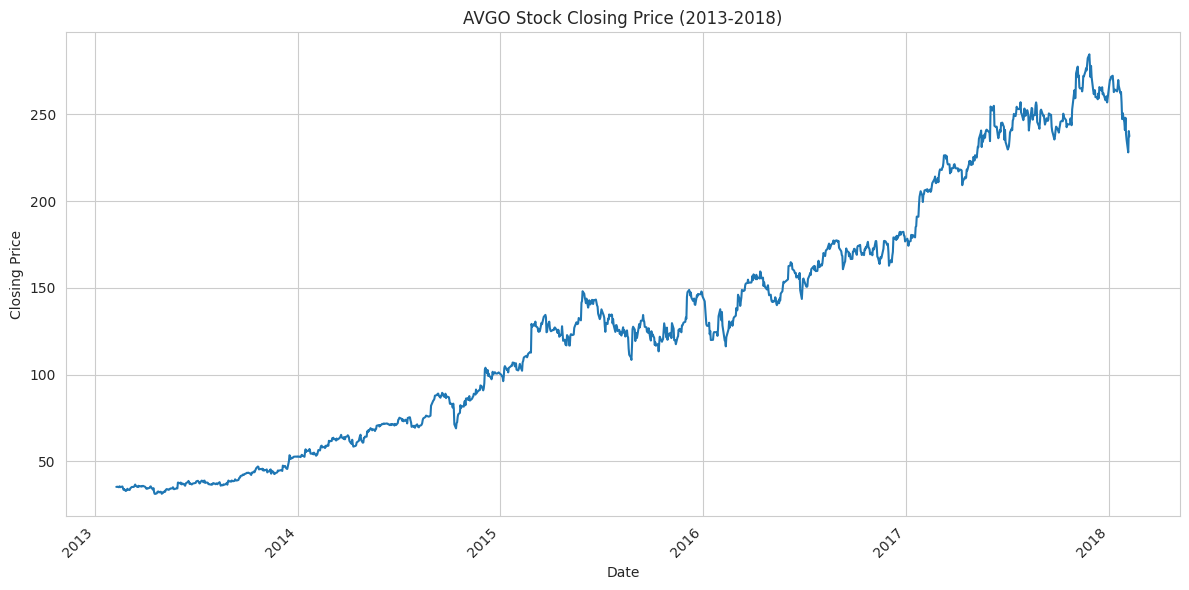

In [23]:
# prompt: generate the stock price graph from 2013 to 2018 for AVGO

# Filter data for AVGO and the specified date range
avgo_data = stock_data[(stock_data['Name'] == 'AVGO') &
                       (stock_data['date'] >= '2013-01-01') &
                       (stock_data['date'] <= '2018-12-31')].copy()

# Convert 'date' column to datetime objects for proper plotting
avgo_data['date'] = pd.to_datetime(avgo_data['date'])

# Plot the closing price over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=avgo_data, x='date', y='close')

# Add titles and labels
plt.title('AVGO Stock Closing Price (2013-2018)')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Improve date formatting on x-axis
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [24]:
avgo_data.tail(7)

,date,open,high,low,close,volume,Name
65309,2018-01-30,241.25,245.03,237.0100,240.98,4600217,AVGO
65310,2018-01-31,250.00,253.14,244.8600,248.03,8048176,AVGO
65311,2018-02-01,241.72,245.90,238.1000,238.79,6685116,AVGO
65312,2018-02-02,236.77,237.96,234.0900,235.48,5835231,AVGO
65313,2018-02-05,234.68,244.00,227.6004,228.10,7077645,AVGO
65314,2018-02-06,225.62,240.40,224.9000,240.38,7774422,AVGO
65315,2018-02-07,238.76,243.10,237.0000,237.38,4047486,AVGO


In [27]:
selected_sector_comp[selected_sector_comp["Symbol"] == "AVGO"]

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
81,AVGO,Broadcom,Information Technology,229.57,15.94,2.948858,4.01,285.68,202.61,9.279197e+10,7.016000e+09,6.961893,4.4,http://www.sec.gov/cgi-bin/browse-edgar?action...
